In [1]:
import numpy as np
import os
import pysynphot as s
import pandas as pd
import matplotlib.pyplot as plt

/home/mldantas/miniconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
spectrum          = '/home/mldantas/Dropbox/DoutoradoIAG/Challenge/Sanity_Check/Specs/0443.51873.152_rebin.txt'
jplus_good_filter = '/home/mldantas/Dropbox/DoutoradoIAG/Challenge/Filters/JPLUS_SDSS_filters/rSDSS_2cols.txt'
jplus_bad_filter  = '/home/mldantas/Dropbox/DoutoradoIAG/Challenge/Filters/JPLUS_SDSS_filters/iSDSS_2cols.txt'

In [3]:
wavelength = np.loadtxt(spectrum, usecols=[0])
f_lambda   = np.loadtxt(spectrum, usecols=[1])

In [4]:
wl_good = np.loadtxt(jplus_good_filter, usecols=[0])
fx_good = np.loadtxt(jplus_good_filter, usecols=[1])
wl_bad = np.loadtxt(jplus_bad_filter, usecols=[0])
fx_bad = np.loadtxt(jplus_bad_filter, usecols=[1])

In [5]:
# Setting the T80 M1 effective area in cm^2 ------------------------------------------------------------------------
s.setref(area=4400)

In [6]:
sdss_spectrum = s.FileSpectrum(spectrum)

In [7]:
jplus_good_bandpass = s.FileBandpass(jplus_good_filter)

In [8]:
jplus_bad_bandpass = s.FileBandpass(jplus_bad_filter)

In [9]:
photometry_good = s.Observation(sdss_spectrum, jplus_good_bandpass, binset=np.arange(3000, 11000), force='extrap')
photometry_good_flam = photometry_good.effstim('flam')
lambda_eff_good = photometry_good.efflam()
print photometry_good_flam
print lambda_eff_good

4.93492437612e-16
6333.9045939


In [10]:
photometry_bad = s.Observation(sdss_spectrum, jplus_bad_bandpass, binset=np.arange(3000, 11000), force='extrap')
photometry_bad_flam = photometry_bad.effstim('flam')
lambda_eff_bad = photometry_bad.efflam()
print photometry_bad_flam
print lambda_eff_bad

3.85719286331e-16
7516.30368089


In [11]:
sp = s.FileSpectrum(spectrum)
i = np.where(sp.flux > 0)
sp2 = s.ArraySpectrum(wave=sp.wave[i], flux=sp.flux[i], fluxunits=sp.fluxunits, waveunits=sp.waveunits)
obs2 = s.Observation(sp2, jplus_bad_bandpass, binset= np.arange(3000, 11000), force='extrap')
phot_obs2 = obs2.effstim('flam')
lamb_obs2 = obs2.efflam()
# ax2 here is the matplotlib axis I have previously created, you can use plt as you did

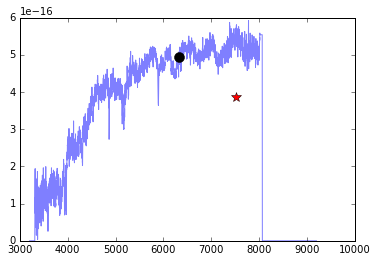

In [12]:
plot01 = plt.plot(wavelength, f_lambda, '-', alpha=0.5)
plot02 = plt.plot(lambda_eff_good, photometry_good_flam, 'o', color='black', markersize=10)
plot03 = plt.plot(lamb_obs2, phot_obs2, '*', color='red', markersize=10, label='badfixed')
# plot03 = plt.plot(lambda_eff_bad, photometry_bad_flam, '*', color='red', markersize=10 )
plt.show()